In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

n

In [26]:
df = pd.read_csv('heart.csv')
df1 = pd.read_csv('o2Saturation.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [27]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [28]:

data_df = pd.DataFrame()
missing_count = df.isnull().sum()
missing_percentages = df.isnull().mean() * 100
dtypes = df.dtypes
uniques = df.nunique()
categories_series = pd.Series([df[column].unique().tolist() for column in df.columns], index=df.columns)
categories_series = categories_series.apply(lambda x: x if len(x) < 15 else 'float_values')

value_counts_dict = {}
for column in df.columns:
    if df[column].nunique() < 11:  # Check if number of unique categories is less than 11
        value_counts_dict[column] = df[column].value_counts().to_dict()
    else:
        value_counts_dict[column] = "float_values"
value_counts_df = pd.Series(value_counts_dict)

data_df = pd.concat([missing_count, missing_percentages, dtypes, uniques, categories_series, value_counts_df],
                   keys=['missing_count', 'missing_percentages', 'dtypes', 'uniques', 'categories_count', 'value_counts_df'],
                   axis=1)


data_df = data_df.sort_values(by=["missing_percentages"], ascending=False)
data_df

,missing_count,missing_percentages,dtypes,uniques,categories_count,value_counts_df
age,0,0.0,int64,41,float_values,float_values
sex,0,0.0,int64,2,"[1, 0]","{1: 207, 0: 96}"
cp,0,0.0,int64,4,"[3, 2, 1, 0]","{0: 143, 2: 87, 1: 50, 3: 23}"
trtbps,0,0.0,int64,49,float_values,float_values
chol,0,0.0,int64,152,float_values,float_values
fbs,0,0.0,int64,2,"[1, 0]","{0: 258, 1: 45}"
restecg,0,0.0,int64,3,"[0, 1, 2]","{1: 152, 0: 147, 2: 4}"
thalachh,0,0.0,int64,91,float_values,float_values
exng,0,0.0,int64,2,"[0, 1]","{0: 204, 1: 99}"
oldpeak,0,0.0,float64,40,float_values,float_values


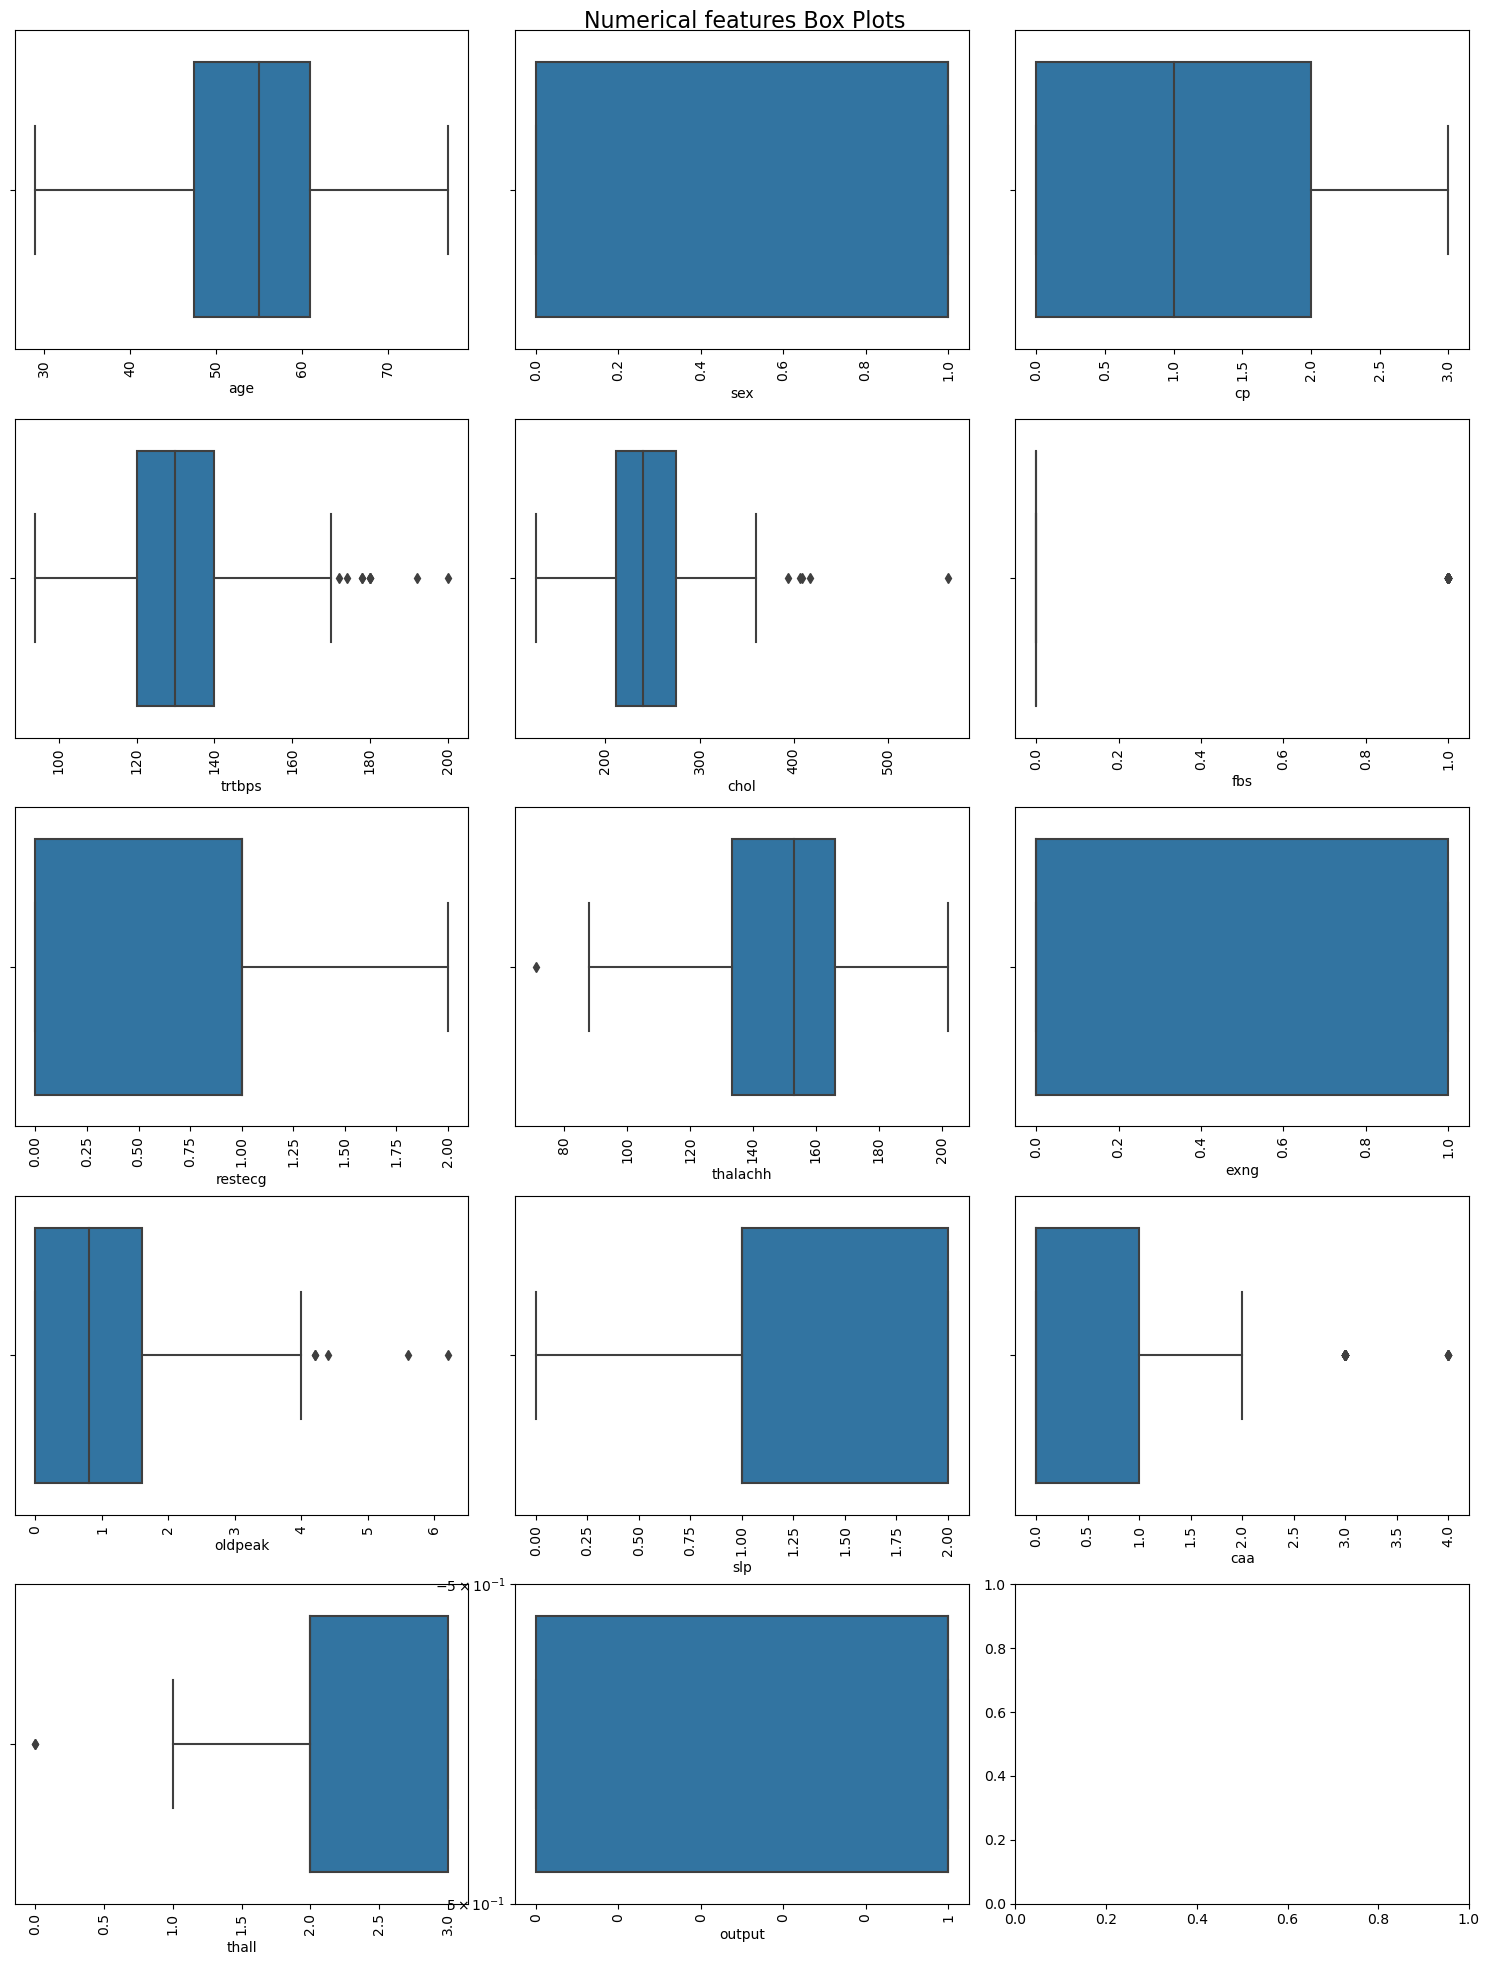

In [29]:
import matplotlib

num_cols = df.columns

ln = (len(num_cols)/3)

fig, axes = plt.subplots(round(ln), 3, figsize=(15,20))

for name, ax in zip(num_cols, axes.flatten()):
#     plt.title(col)
    sns.boxplot(x=name, data=df, ax=ax)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

    
#     features_data[col].value_counts()[:10].plot(kind='bar')
    

plt.tight_layout()
fig.suptitle('Numerical features Box Plots', size=16)
ax.set_yscale('symlog')
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.subplots_adjust(top=0.97)

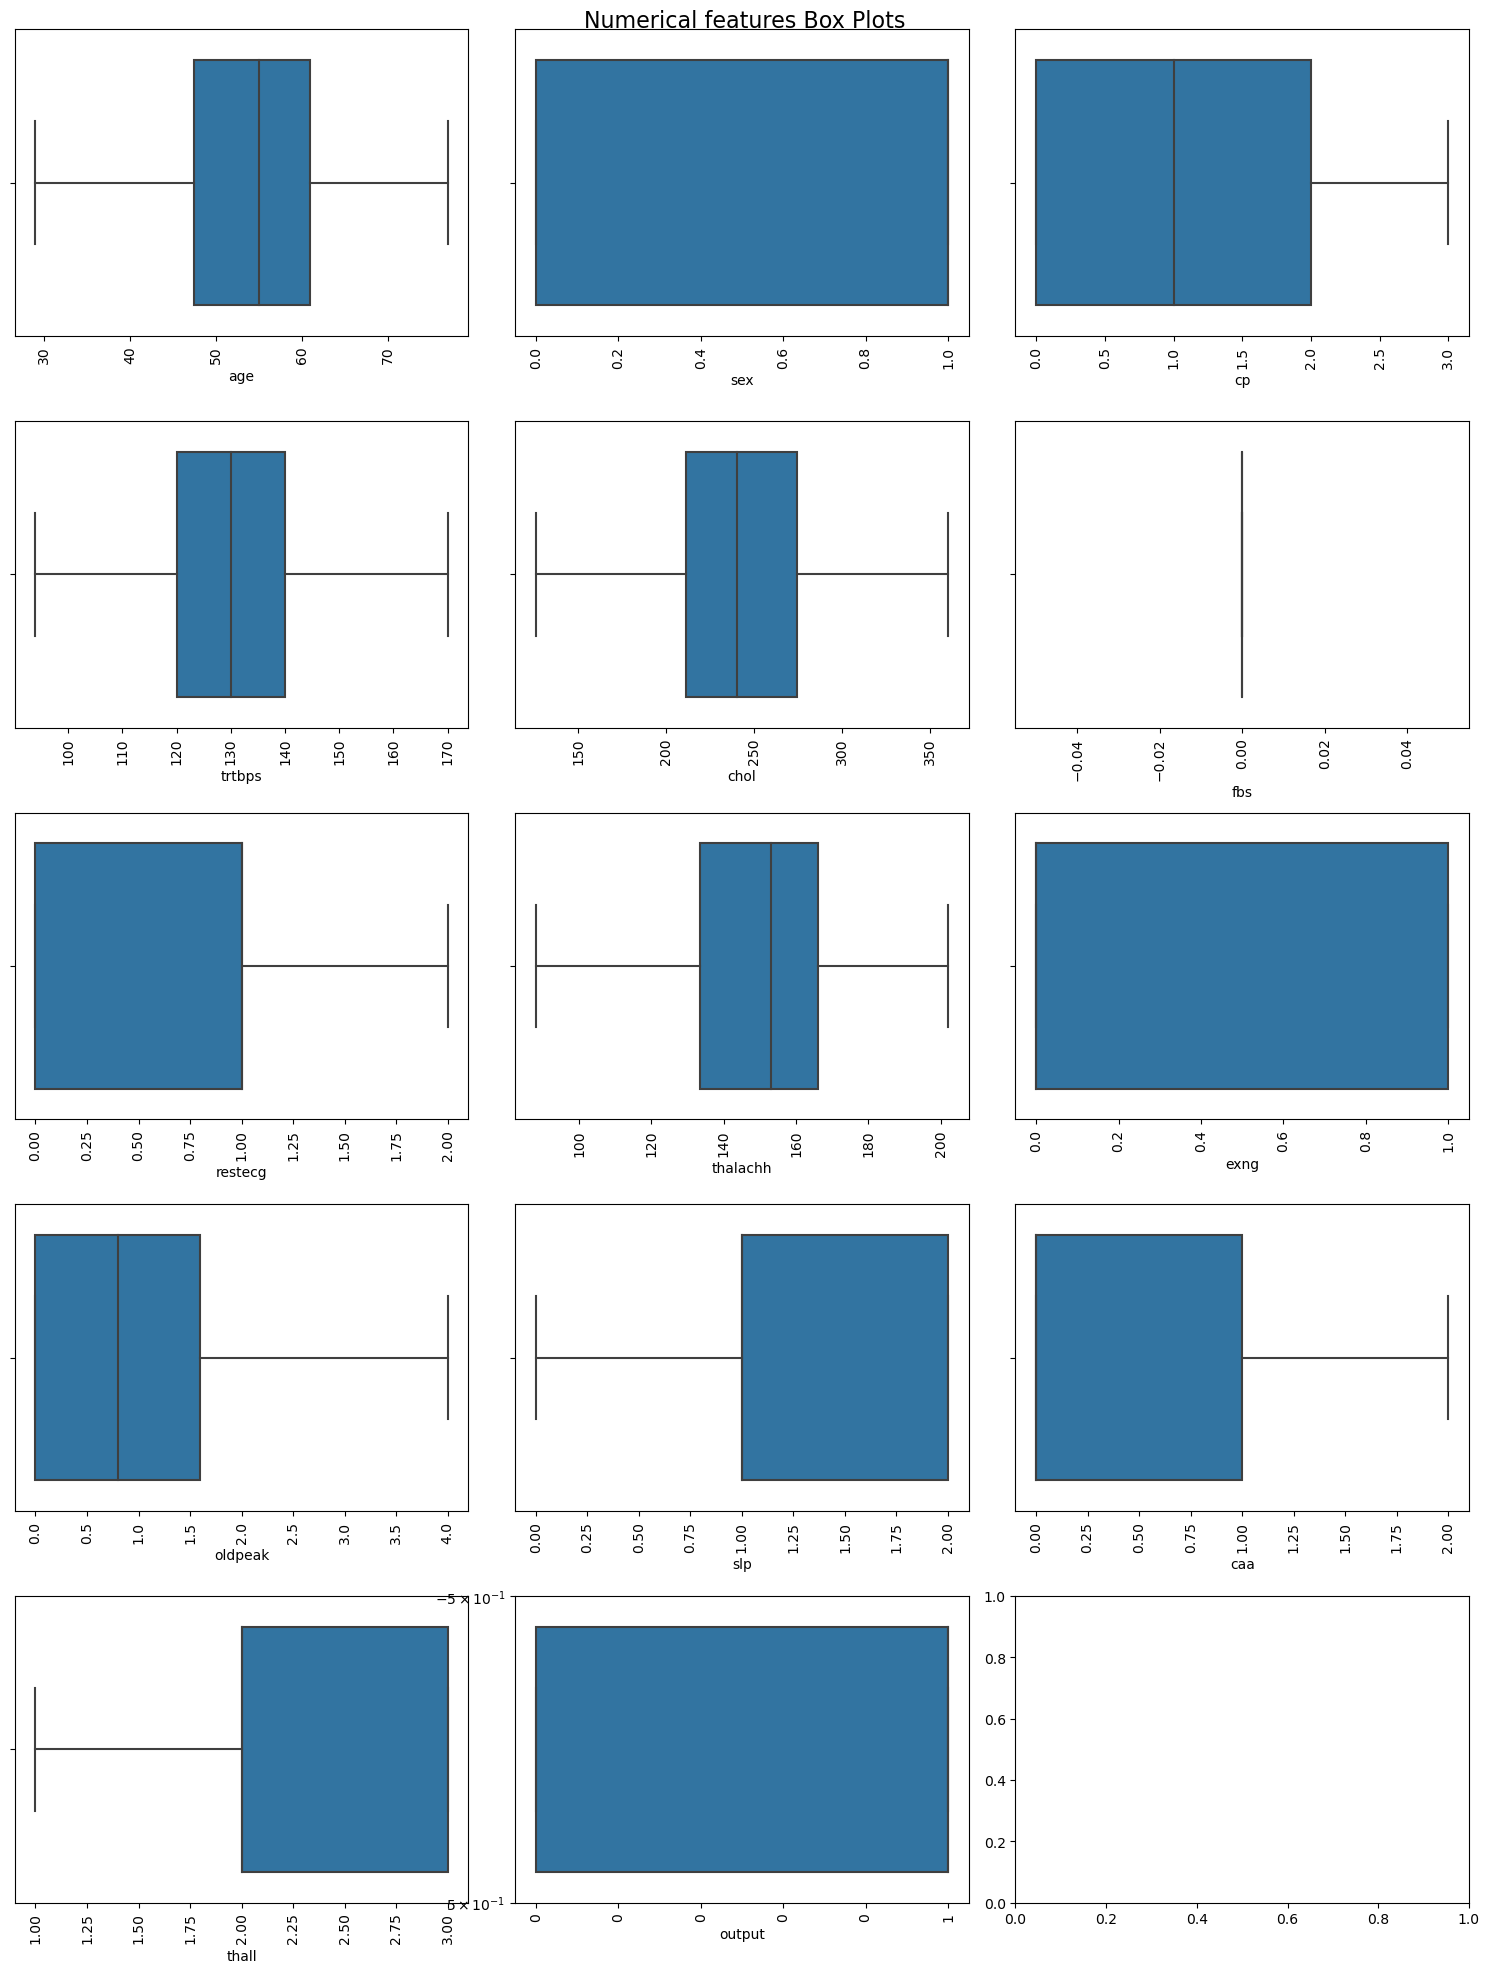

In [30]:
## WITHOUT OUTLIERS
import matplotlib

num_cols = df.columns

ln = (len(num_cols)/3)

fig, axes = plt.subplots(round(ln), 3, figsize=(15,20))

for name, ax in zip(num_cols, axes.flatten()):
#     plt.title(col)
    sns.boxplot(x=name, data=df, ax=ax,showfliers=False)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

    
#     features_data[col].value_counts()[:10].plot(kind='bar')
    

plt.tight_layout()
fig.suptitle('Numerical features Box Plots', size=16)
ax.set_yscale('symlog')
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.subplots_adjust(top=0.97)

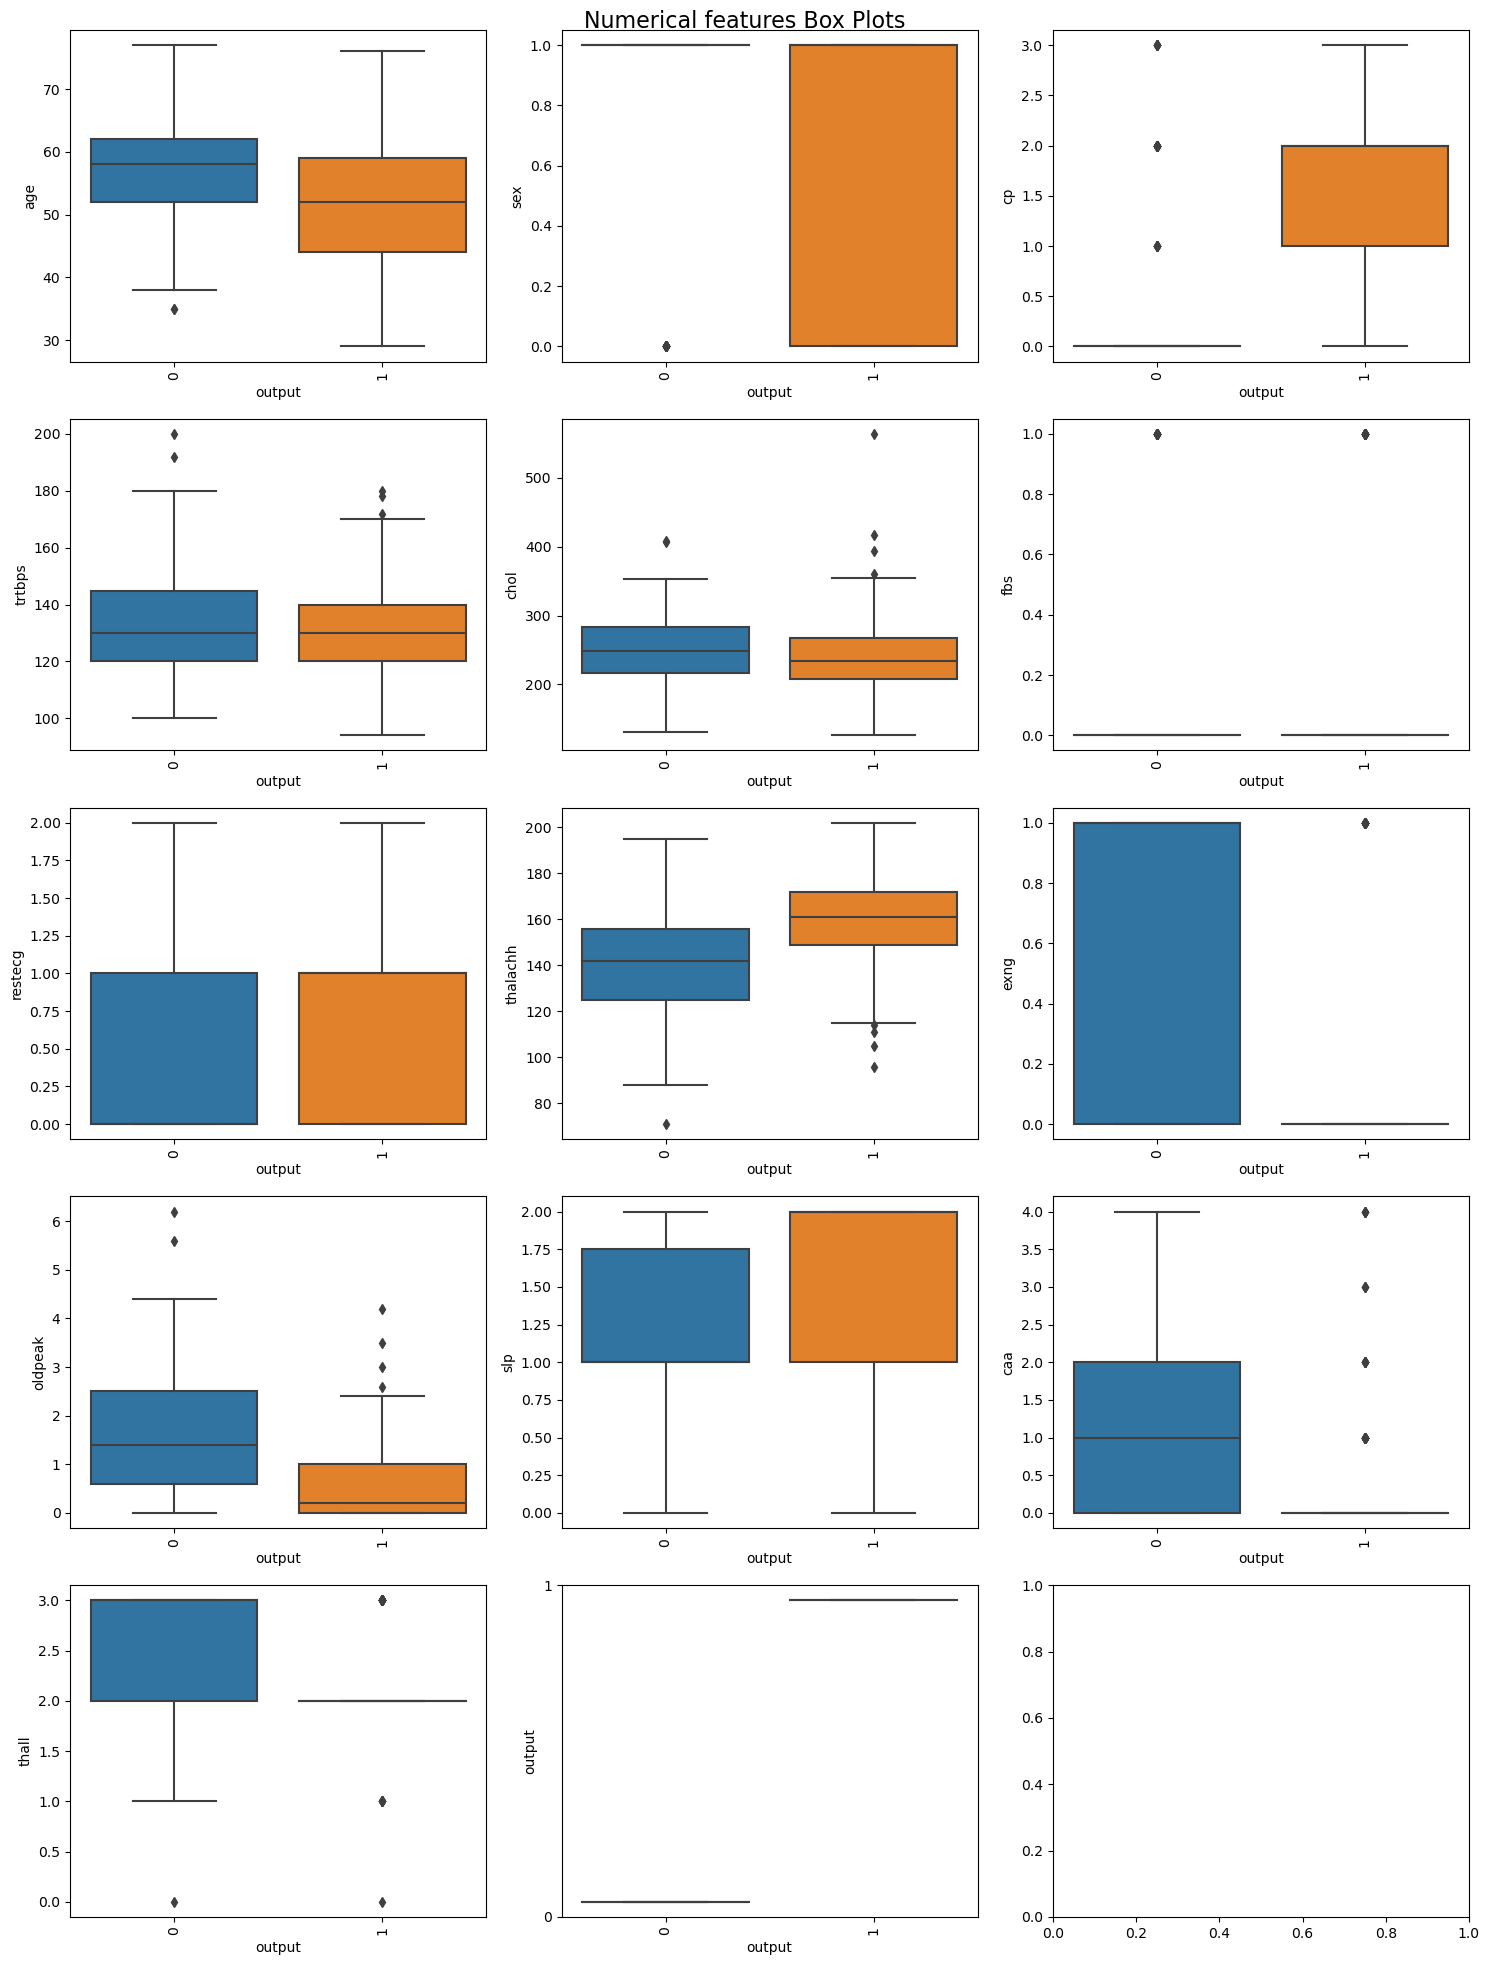

In [31]:
fig, axes = plt.subplots(round(ln), 3, figsize=(15,20))

for name, ax in zip(num_cols, axes.flatten()):
#     plt.title(col)
    sns.boxplot(x = "output", y=name, data=df, ax=ax)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
#     features_data[col].value_counts()[:10].plot(kind='bar')
    
plt.tight_layout()
fig.suptitle('Numerical features Box Plots', size=16)
ax.set_yscale('symlog')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.subplots_adjust(top=0.97)

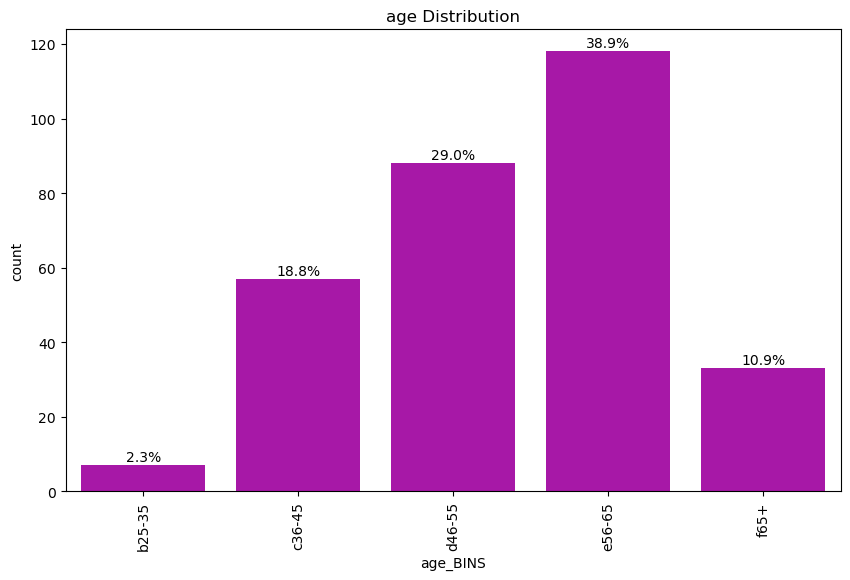

In [32]:
def tenure_lab(df):
    if (df['age'] < 18):
        return 'Minor'
    elif (df['age'] > 17) & (df['age'] <= 24):
        return 'a18-24'
    elif (df['age'] > 24) & (df['age'] <= 35):
        return 'b25-35'
    elif (df['age'] > 35) & (df['age'] <= 45):
        return 'c36-45'
    elif (df['age'] > 45) & (df['age'] <= 55):
        return 'd46-55'
    elif (df['age'] > 55) & (df['age'] <= 65):
        return 'e56-65'
    elif df['age'] > 65:
        return 'f65+'
    
df['age_BINS'] = df.apply(lambda age:tenure_lab(age), axis = 1)
plt.figure(figsize = (10,6))
ax=sns.countplot(x = 'age_BINS', data = df.sort_values(by='age_BINS'),
             color = 'm'
             )
plt.title('age Distribution')
plt.xticks(rotation=90)
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

In [33]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_BINS
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,e56-65
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,c36-45
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,c36-45
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,e56-65
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,e56-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,e56-65
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,c36-45
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,f65+
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,e56-65


In [34]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [60]:
df.age_BINS = df.age_BINS.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    int64   
 2   cp        303 non-null    int64   
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    int64   
 6   restecg   303 non-null    int64   
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    int64   
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    int64   
 11  caa       303 non-null    int64   
 12  thall     303 non-null    int64   
 13  output    303 non-null    int64   
 14  age_BINS  303 non-null    category
dtypes: category(1), float64(1), int64(13)
memory usage: 33.8 KB


## FEATURE SELECTION

In [61]:
x_sample = df.drop('output', axis=1)
y = df['output']

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

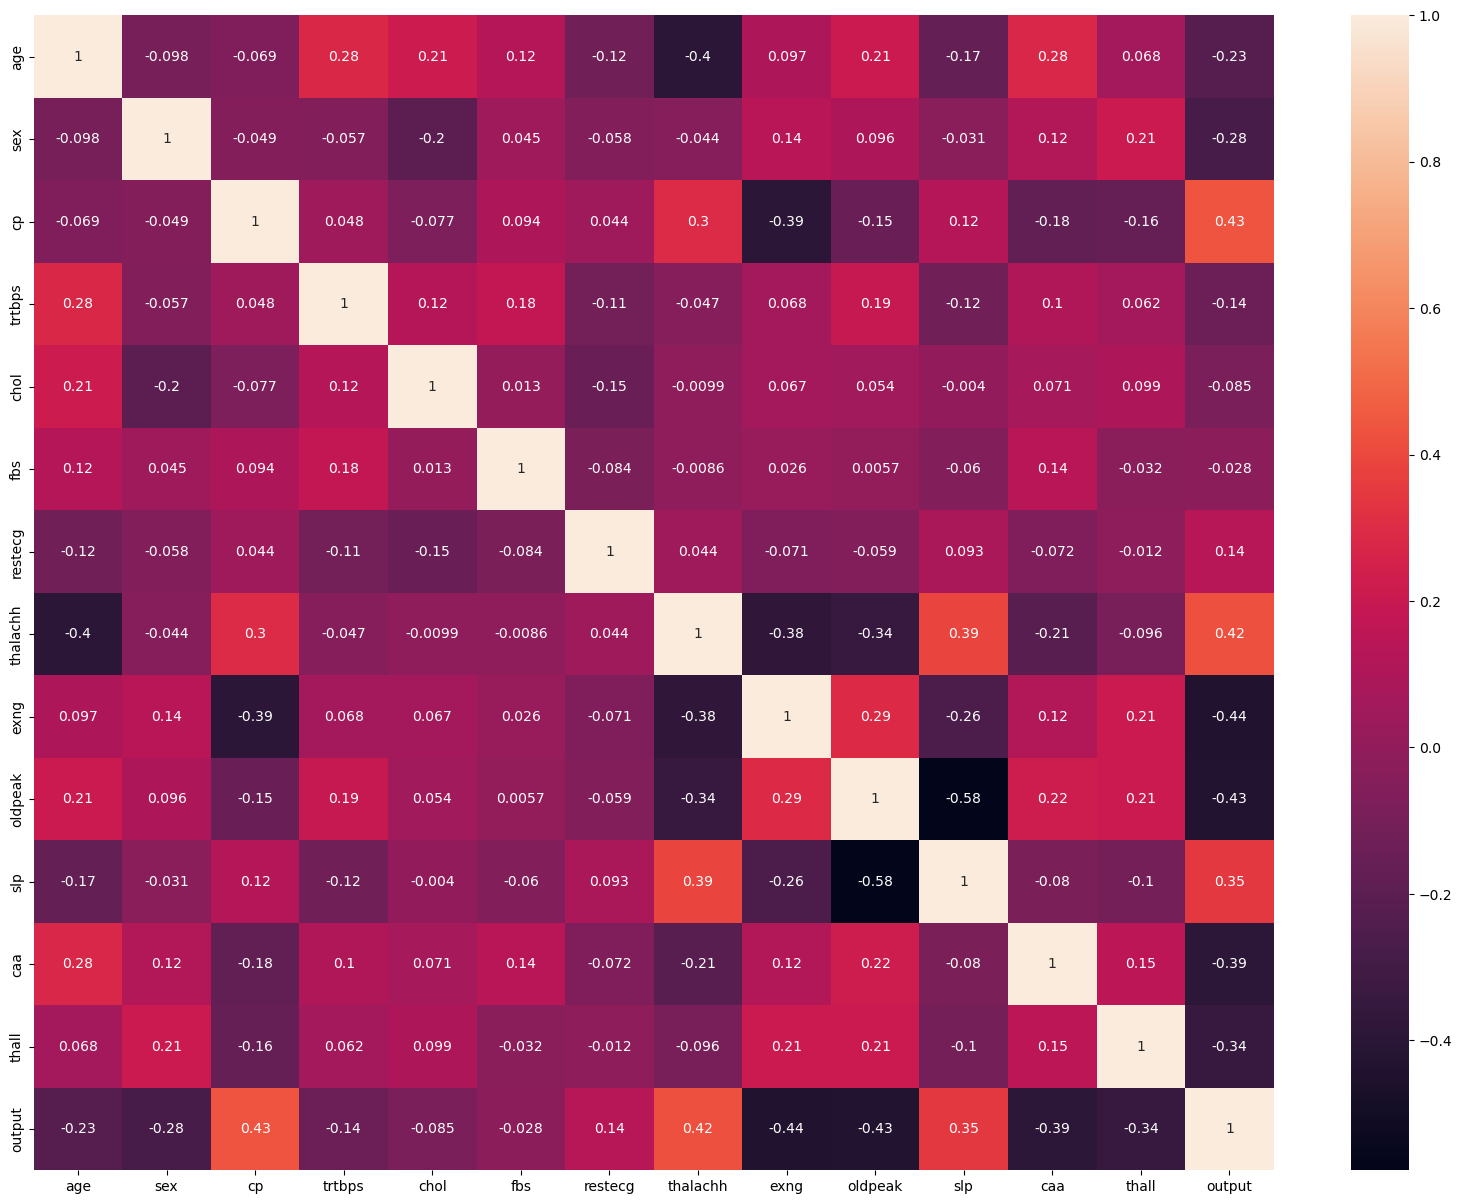

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

In [63]:
cor_matrix = df.corr().abs()


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


In [64]:
upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

In [65]:
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] >= 0.90)]
print(to_drop)

[]


In [66]:
cols = df.select_dtypes(include='number').columns.tolist()
cols

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

In [67]:
cols1 = df.select_dtypes(include='category').columns.tolist()
cols1

['age_BINS']

In [73]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

selected_cols = df.columns.to_list()
selected_cols.remove('age_BINS')

# Standardize the predictor variables (required for VIF calculation)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_cols])

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Features"] = df[selected_cols].columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Output the VIF values
vif = vif.sort_values(by="VIF", ascending=False).reset_index(drop=True)
vif


,Features,VIF
0,output,2.072754
1,oldpeak,1.744666
2,slp,1.662325
3,thalachh,1.653567
4,age,1.443937
5,exng,1.440147
6,cp,1.397152
7,caa,1.290729
8,sex,1.231356
9,thall,1.191528


## TRAIN TEST SPLIT

In [74]:
df.shape

(303, 15)

In [75]:
# Calculate the number of rows for the training and test sets

train_size = int(0.90 * len(df))
test_size = len(df) - train_size

# Sample the training set
train_df = df.sample(n=train_size, random_state=42)

# Sample the test set (exclude the rows already in the training set)
test_df = df.drop(train_df.index).sample(n=test_size, random_state=42)

train_df.shape, test_df.shape

((272, 15), (31, 15))

In [76]:
train_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_BINS
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0,e56-65
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,e56-65
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1,e56-65
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0,e56-65
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,f65+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1,d46-55
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0,f65+
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0,e56-65
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1,c36-45


In [77]:
test_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_BINS
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,d46-55
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1,e56-65
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0,d46-55
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0,e56-65
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1,d46-55
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1,e56-65
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,e56-65
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0,e56-65
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1,d46-55
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1,e56-65


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'target_column' is the column containing the target variable

# Split the DataFrame into features (X) and target (y)
X = train_df.drop('output', axis=1)
y = train_df[['output']]

# Perform the train-test split with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((217, 14), (55, 14), (217, 1), (55, 1))

In [79]:
y_train.value_counts(normalize=True)

output
1         0.548387
0         0.451613
dtype: float64

In [80]:
y_test.value_counts(normalize=True)

output
1         0.545455
0         0.454545
dtype: float64

In [81]:
test_df.output.value_counts(normalize=True)

1    0.516129
0    0.483871
Name: output, dtype: float64

In [211]:
from catboost import CatBoostClassifier, CatBoostRegressor

# train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
# val_pool = Pool(data=X_val, label=y_val, cat_features=categorical_features)


# Initialize the CatBoostClassifier

clf = CatBoostClassifier(depth= 3,
                         iterations = 100,       # Max 550-600
                         l2_leaf_reg = 2, 
                         learning_rate= 0.5,     # 0.1 - 0.0009
                         # subsample=0.7,        # 0.1 - 0.9
                         
                         random_seed=42,
                         auto_class_weights="SqrtBalanced",
                         eval_metric="TotalF1"
                        )

clfmodel = clf.fit(X_train, y_train,
                   cat_features=X_train.select_dtypes(include='category').columns.tolist(),
                   verbose=False, 
                   eval_set=(X_test, y_test),
                   plot=True,
                   early_stopping_rounds=50,
                  )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# On Test data

In [212]:
test_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_BINS
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,d46-55
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1,e56-65
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0,d46-55
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0,e56-65
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1,d46-55
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1,e56-65
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,e56-65
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0,e56-65
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1,d46-55
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1,e56-65


In [213]:
# test_df

test_data = test_df.drop('output', axis=1)
print('test size:  ', test_data.shape)

test_labels = test_df['output']
test_labels.value_counts()

test size:   (31, 14)


1    16
0    15
Name: output, dtype: int64



Test CM


[[12  3]
 [ 2 14]]


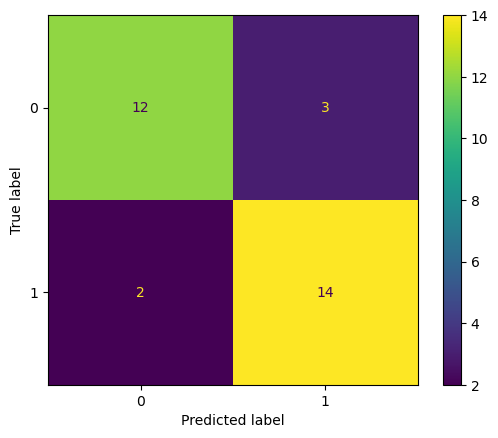

Confusion Matrix with Original Class Labels:
    0   1
0  12   3
1   2  14



Train CM




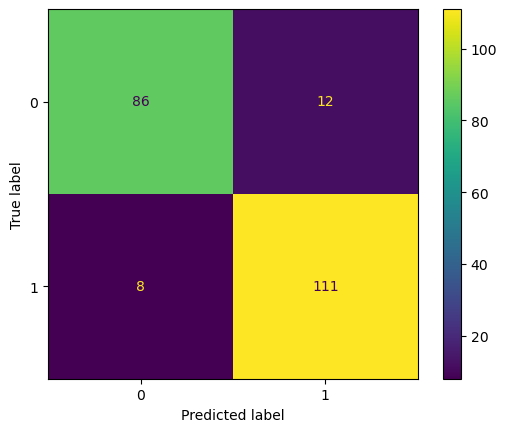

Confusion Matrix with Original Class Labels:
    0    1
0  86   12
1   8  111


In [214]:
from sklearn import metrics

labels = [0,1]

"predictions on test"
preds_prob_test = np.max(clfmodel.predict_proba(test_data), axis=1)
y_pred_test = clfmodel.predict(test_data)

print("\n\nTest CM\n\n")
confusion_matrix_test = metrics.confusion_matrix(test_labels, y_pred_test, labels=labels)
print(confusion_matrix_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test)
cm_display.plot()
plt.show()

# Convert the confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(confusion_matrix_test, index=labels, columns=labels)
# Output the confusion matrix DataFrame
print("Confusion Matrix with Original Class Labels:")
print(conf_matrix_df)


"Prediction on train"
preds_prob1 = np.max(clfmodel.predict_proba(X_train), axis=1)
y_pred_train = clfmodel.predict(X_train)

print("\n\n\nTrain CM\n\n")
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train, labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()


# Convert the confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(confusion_matrix, index=labels, columns=labels)
# Output the confusion matrix DataFrame
print("Confusion Matrix with Original Class Labels:")
print(conf_matrix_df)

In [215]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, log_loss

def one_vs_all_auc_ks_gini_logloss(true_labels, predicted_probabilities):
    num_classes = predicted_probabilities.shape[1]
    auc_scores = []
    ks_scores = []
    gini_scores = []
    log_loss_scores = []

    for class_index in range(num_classes):
        # For each class, treat it as positive, and the rest as negative
        true_class = np.where(true_labels == class_index, 1, 0)
        predicted_class_probabilities = predicted_probabilities[:, class_index]

        # Calculate AUC
        auc_score = roc_auc_score(true_class, predicted_class_probabilities)
        auc_scores.append(auc_score)

        # Calculate KS
        fpr, tpr, thresholds = roc_curve(true_class, predicted_class_probabilities)
        ks_score = max(tpr - fpr)
        ks_scores.append(ks_score)

        # Calculate Gini
        gini_score = 2 * auc_score - 1
        gini_scores.append(gini_score)       
        
        # Calculate logloss
        log_loss_score = log_loss(np.array(true_class), predicted_class_probabilities)
        log_loss_scores.append(log_loss_score)

    return auc_scores, ks_scores, gini_scores, log_loss_scores

In [216]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the categorical column to numerical labels
test_labels_encoded = label_encoder.fit_transform(test_labels)

In [217]:
# Calculate AUC, KS, and Gini for each class

# logloss = log_loss(y_test, probs)

probs_test = clfmodel.predict_proba(test_data)
auc_scores, ks_scores, gini_scores, log_loss_scores = one_vs_all_auc_ks_gini_logloss(test_labels_encoded, probs_test)

# Average the scores to get an overall performance measure
mean_auc_test = np.mean(auc_scores)
mean_ks_test = np.mean(ks_scores)
mean_gini_test = np.mean(gini_scores)
mean_log_loss_test = np.mean(log_loss_scores)

print("AUC Scores per Class:", auc_scores)
print("KS Scores per Class:", ks_scores)
print("Gini Scores per Class:", gini_scores)
print("Logloss Scores per Class:", log_loss_scores)
print("Mean AUC:", mean_auc_test)
print("Mean KS:", mean_ks_test)
print("Mean Gini:", mean_gini_test)
print(f"Mean Log Loss (test): {mean_log_loss_test:.4f}")

AUC Scores per Class: [0.9416666666666667, 0.9416666666666667]
KS Scores per Class: [0.8125, 0.8125]
Gini Scores per Class: [0.8833333333333333, 0.8833333333333333]
Logloss Scores per Class: [0.3427098092533765, 0.3427098092533765]
Mean AUC: 0.9416666666666667
Mean KS: 0.8125
Mean Gini: 0.8833333333333333
Mean Log Loss (test): 0.3427


# Other Metrics

In [218]:
from sklearn.metrics import log_loss

# Predict probabilities for the test set
probs = clfmodel.predict_proba(X_test)

# Calculate the log loss
logloss = log_loss(y_test, probs)
print(f"Logloss: {logloss:.4f}")

Logloss: 0.3602


In [219]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Macro-averaged Precision, Recall, and F1 Score
macro_precision_test = precision_score(test_labels, y_pred_test, average='macro')
macro_recall_test = recall_score(test_labels, y_pred_test, average='macro')
macro_f1_score_test = f1_score(test_labels, y_pred_test, average='macro')
logloss_test = log_loss(y_test, probs)

print("Macro-averaged Precision:", macro_precision_test)
print("Macro-averaged Recall:", macro_recall_test)
print("Macro-averaged F1-score:", macro_f1_score_test)
print("Macro-averaged log_loss:", logloss_test)

Macro-averaged Precision: 0.8403361344537814
Macro-averaged Recall: 0.8375
Macro-averaged F1-score: 0.8380355276907001
Macro-averaged log_loss: 0.3601811378891229


# On Train Data

In [220]:
# Calculate AUC, KS, and Gini for each class

probs1 = clfmodel.predict_proba(X_train)
auc_scores, ks_scores, gini_scores,log_loss_scores = one_vs_all_auc_ks_gini_logloss(y_train, probs1)

# Average the scores to get an overall performance measure
mean_auc_train = np.mean(auc_scores)
mean_ks_train = np.mean(ks_scores)
mean_gini_train = np.mean(gini_scores)
mean_log_loss_train = np.mean(log_loss_scores)

print("AUC Scores per Class:", auc_scores)
print("KS Scores per Class:", ks_scores)
print("Gini Scores per Class:", gini_scores)
print("Logloss Scores per Class:", log_loss_scores)
print("Mean AUC:", mean_auc_train)
print("Mean KS:", mean_ks_train)
print("Mean Gini:", mean_gini_train)
print(f"Mean Log Loss (train): {mean_log_loss_test:.4f}")

AUC Scores per Class: [0.9661293088664037, 0.9661293088664038]
KS Scores per Class: [0.84093637454982, 0.84093637454982]
Gini Scores per Class: [0.9322586177328074, 0.9322586177328076]
Logloss Scores per Class: [0.2691524315050858, 0.2691524315050858]
Mean AUC: 0.9661293088664038
Mean KS: 0.84093637454982
Mean Gini: 0.9322586177328075
Mean Log Loss (train): 0.3427


In [221]:
# Macro-averaged Precision, Recall, and F1 Score

macro_precision_train = precision_score(y_train, y_pred_train, average='macro')
macro_recall_train = recall_score(y_train, y_pred_train, average='macro')
macro_f1_score_train = f1_score(y_train, y_pred_train, average='macro')

probs1 = clfmodel.predict_proba(X_train)
logloss_train = log_loss(y_train, probs1)

print("Macro-averaged Precision:", macro_precision_train)
print("Macro-averaged Recall:", macro_recall_train)
print("Macro-averaged F1-score:", macro_f1_score_train)
print("Macro-averaged log_loss:", logloss_train)

Macro-averaged Precision: 0.9086663207057603
Macro-averaged Recall: 0.9051620648259304
Macro-averaged F1-score: 0.9065943526170799
Macro-averaged log_loss: 0.2691524315050858


# Deviation

In [222]:
print("------------Train and test standard difference-----------------")

f1_deviation = (macro_f1_score_train - macro_f1_score_test) / macro_f1_score_train
precis_deviation = (macro_precision_train - macro_precision_test) / macro_precision_train
recl_deviation = (macro_recall_train - macro_recall_test) / macro_recall_train
auc_roc_deviation = (mean_auc_train - mean_auc_test) / mean_auc_train
ks_deviation = (mean_ks_train - mean_ks_test) / mean_ks_train
gini_deviation = (mean_gini_train - mean_gini_test) / mean_gini_train
logloss_deviation = (logloss_train - logloss_test) / logloss_train


print("F1 train standard difference", f1_deviation)
print("Precision standard difference", precis_deviation)
print("Recall standard difference", recl_deviation)
print("AUC standard difference", auc_roc_deviation)
print("KS standard difference", ks_deviation)
print("Gini standard difference", gini_deviation)

------------Train and test standard difference-----------------
F1 train standard difference 0.07562238252253607
Precision standard difference 0.07519832604658094
Recall standard difference 0.07475132625994697
AUC standard difference 0.025320256797136294
KS standard difference 0.03381513204853679
Gini standard difference 0.052480377728722216


In [224]:
keys = ["f1", "precision" ,"recall" , "auc_roc" , "ks_score" ,"gini",'logloss']

deviation_dict = {"f1" : f1_deviation,
                    "precision" : precis_deviation,
                    "recall" : recl_deviation,
                    "auc_roc" : auc_roc_deviation,
                    "ks_score" : ks_deviation,
                    "gini" : gini_deviation,
                  "logloss": logloss_deviation}


b = pd.Series(deviation_dict, index=keys)
result_df = pd.DataFrame(b, columns = ["features_test"])
result_df

,features_test
f1,0.075622
precision,0.075198
recall,0.074751
auc_roc,0.025320
ks_score,0.033815
gini,0.052480
logloss,-0.338205


## DATA VALIDATION

In [225]:
# import pickle

# # Save the trained model to a pickle file

# filename = 'heart_attack.pkl'
# with open(filename, 'wb') as file:
#     pickle.dump(clfmodel, file)

In [226]:
import pickle

# Load the pickled model
with open("heart_attack.pkl", 'rb') as model_file:
    model = pickle.load(model_file)

In [228]:
test_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_BINS
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,d46-55
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1,e56-65
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0,d46-55
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0,e56-65
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1,d46-55


In [236]:
X = test_df.drop('output', axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 270 to 71
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       31 non-null     int64   
 1   sex       31 non-null     int64   
 2   cp        31 non-null     int64   
 3   trtbps    31 non-null     int64   
 4   chol      31 non-null     int64   
 5   fbs       31 non-null     int64   
 6   restecg   31 non-null     int64   
 7   thalachh  31 non-null     int64   
 8   exng      31 non-null     int64   
 9   oldpeak   31 non-null     float64 
 10  slp       31 non-null     int64   
 11  caa       31 non-null     int64   
 12  thall     31 non-null     int64   
 13  age_BINS  31 non-null     category
dtypes: category(1), float64(1), int64(12)
memory usage: 3.6 KB


In [237]:
predictions = model.predict(X)

In [238]:
test_df['prediction'] = predictions

In [240]:
test_df.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_BINS,prediction
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1,d46-55,1
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0,d46-55,0
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,e56-65,1
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1,e56-65,1
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0,e56-65,0


In [241]:
test_df.output.value_counts()

1    16
0    15
Name: output, dtype: int64

In [242]:
test_df.prediction.value_counts()

1    17
0    14
Name: prediction, dtype: int64

In [243]:
# Compare values in Column1 and Column2
comparison_result = test_df['output'] == test_df['prediction']

# Create a new column to store the comparison result (True if they are the same, False if not)
test_df['ValuesAreEqual'] = comparison_result

In [247]:
test_df.ValuesAreEqual.value_counts()

True     26
False     5
Name: ValuesAreEqual, dtype: int64

In [248]:
print(f'The Accuracy is {26/31}')

The Accuracy is 0.8387096774193549
